In [32]:
NUM_NODES = 50
NUM_EDGES = 150
NUM_OD_PAIRS = 10


In [33]:
!pip install gurobipy numpy pandas matplotlib networkx


In [21]:
import gurobipy as gp

params = {
    "WLSACCESSID": "1e335bee-25ff-4080-907f-c54625d209bb",
    "WLSSECRET": "ae1ce61d-790d-4250-a7a2-19add6761142",
    "LICENSEID": 2718097
}

env = gp.Env(params=params)
model = gp.Model(env=env)
print("✅ Gurobi WLS license activated successfully!")


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2718097
Academic license 2718097 - for non-commercial use only - registered to ee___@iiti.ac.in
✅ Gurobi WLS license activated successfully!


In [41]:
!rm -rf Multi-Commodity-Network-Flow
!git clone https://github.com/yuzhenfeng2002/Multi-Commodity-Network-Flow.git
%cd Multi-Commodity-Network-Flow


Cloning into 'Multi-Commodity-Network-Flow'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 31 (delta 8), reused 23 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 684.05 KiB | 27.36 MiB/s, done.
Resolving deltas: 100% (8/8), done.
/content/multi_agent_path_planning/Multi-Commodity-Network-Flow/Multi-Commodity-Network-Flow


In [42]:
import pandas as pd
import numpy as np
import random

random.seed(42)
np.random.seed(42)

edges = []
for i in range(NUM_EDGES):
    from_node = random.randint(0, NUM_NODES - 1)
    to_node = random.randint(0, NUM_NODES - 1)
    if from_node != to_node:
        capacity = random.randint(5, 20)
        cost = random.randint(1, 10)
        edges.append({
            'from': from_node,
            'to': to_node,
            'capacity': capacity,
            'cost': cost
        })

network_df = pd.DataFrame(edges)
network_df.to_csv('network/custom_network.csv', index=False)

od_pairs = []
for i in range(NUM_OD_PAIRS):
    origin = random.randint(0, NUM_NODES // 2)
    destination = random.randint(NUM_NODES // 2, NUM_NODES - 1)
    demand = random.randint(2, 8)
    od_pairs.append({
        'origin': origin,
        'destination': destination,
        'demand': demand
    })

demand_df = pd.DataFrame(od_pairs)
demand_df.to_csv('network/custom_demand.csv', index=False)

print(f"✅ Network created:")
print(f"   Nodes: {NUM_NODES}")
print(f"   Edges: {len(edges)}")
print(f"   OD Pairs (Commodities): {NUM_OD_PAIRS}")
print(f"\n📊 Sample OD Pairs:")
print(demand_df)


✅ Network created:
   Nodes: 50
   Edges: 146
   OD Pairs (Commodities): 10

📊 Sample OD Pairs:
   origin  destination  demand
0      16           40       7
1       7           33       5
2       2           47       4
3       7           33       4
4      10           42       2
5       4           29       3
6      12           47       3
7      22           31       2
8      13           38       4
9      17           39       5


In [43]:
!python main.py


Restricted license - for non-production use only - expires 2026-11-23
Set parameter LogToConsole to value 0
Iteration time: 10.45s. Objective: 3439373.87.
Set parameter LogToConsole to value 0
Iteration time: 0.01s. Objective: 3176000.00.
Set parameter LogToConsole to value 0
Iteration time: 0.31s. Objective: 3296681.27.
Set parameter LogToConsole to value 0
Iteration time: 0.39s. Objective: 3348256.78.
Set parameter LogToConsole to value 0
Iteration time: 1.79s. Objective: 3375718.70.
Set parameter LogToConsole to value 0
Iteration time: 4.81s. Objective: 3400895.96.
Set parameter LogToConsole to value 0
Iteration time: 4.82s. Objective: 3413609.19.
Set parameter LogToConsole to value 0
Iteration time: 3.08s. Objective: 3425322.43.
Set parameter LogToConsole to value 0
Iteration time: 2.68s. Objective: 3435217.43.
Set parameter LogToConsole to value 0
Iteration time: 3.30s. Objective: 3439062.55.
Set parameter LogToConsole to value 0
Iteration time: 4.89s. Objective: 3439373.87.
Set p

In [44]:
import pandas as pd

iterations = pd.read_csv('./output/iterations.txt', sep='\s+')
print("📊 Optimization Progress:")
print(iterations.tail(10))

print("\n🛣️ Sample Routes (First 10):")
with open('./output/routes.txt', 'r') as f:
    for i, line in enumerate(f.readlines()[:10]):
        print(line.strip())

flows = pd.read_csv('./output/flow.txt', sep='\s+', names=['edge', 'flow'])
print("\n📈 Edge Flows (First 10):")
print(flows.head(10))


📊 Optimization Progress:
     iter_num         obj  reduced_cost
312       312  3439386.75        113.73
313       313  3439382.25        326.77
314       314  3439382.12        316.15
315       315  3439380.58        277.98
316       316  3439380.49        270.91
317       317  3439379.35        128.87
318       318  3439379.31        128.87
319       319  3439379.27        128.87
320       320  3439376.09        135.98
321       321  3439373.87         -0.00

🛣️ Sample Routes (First 10):
id	ratio	route
1	1.000000	1->2->
2	1.000000	1->3->
3	1.000000	1->3->4->
4	1.000000	1->3->4->5->
5	1.000000	1->2->6->
6	1.000000	1->2->6->8->7->
7	1.000000	1->2->6->8->
8	1.000000	1->3->4->5->9->
9	1.000000	1->3->4->5->9->10->

📈 Edge Flows (First 10):
               edge      flow
id uid vid     flow  capacity
0  1   2     3100.0   51800.4
1  1   3     6700.0   46806.9
2  2   1     3100.0   51800.4
3  2   6     5900.0    9916.4
4  3   1     6700.0   46806.9
5  3   4    12199.8   34221.0
6  3   12    

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3758348945.py:3: SyntaxWarning: invalid escape sequence '\s'
  iterations = pd.read_csv('./output/iterations.txt', sep='\s+')
/tmp/ipython-input-3758348945.py:12: SyntaxWarning: invalid escape sequence '\s'
  flows = pd.read_csv('./output/flow.txt', sep='\s+', names=['edge', 'flow'])



✅ Visualization saved: network_flow_visualization.png


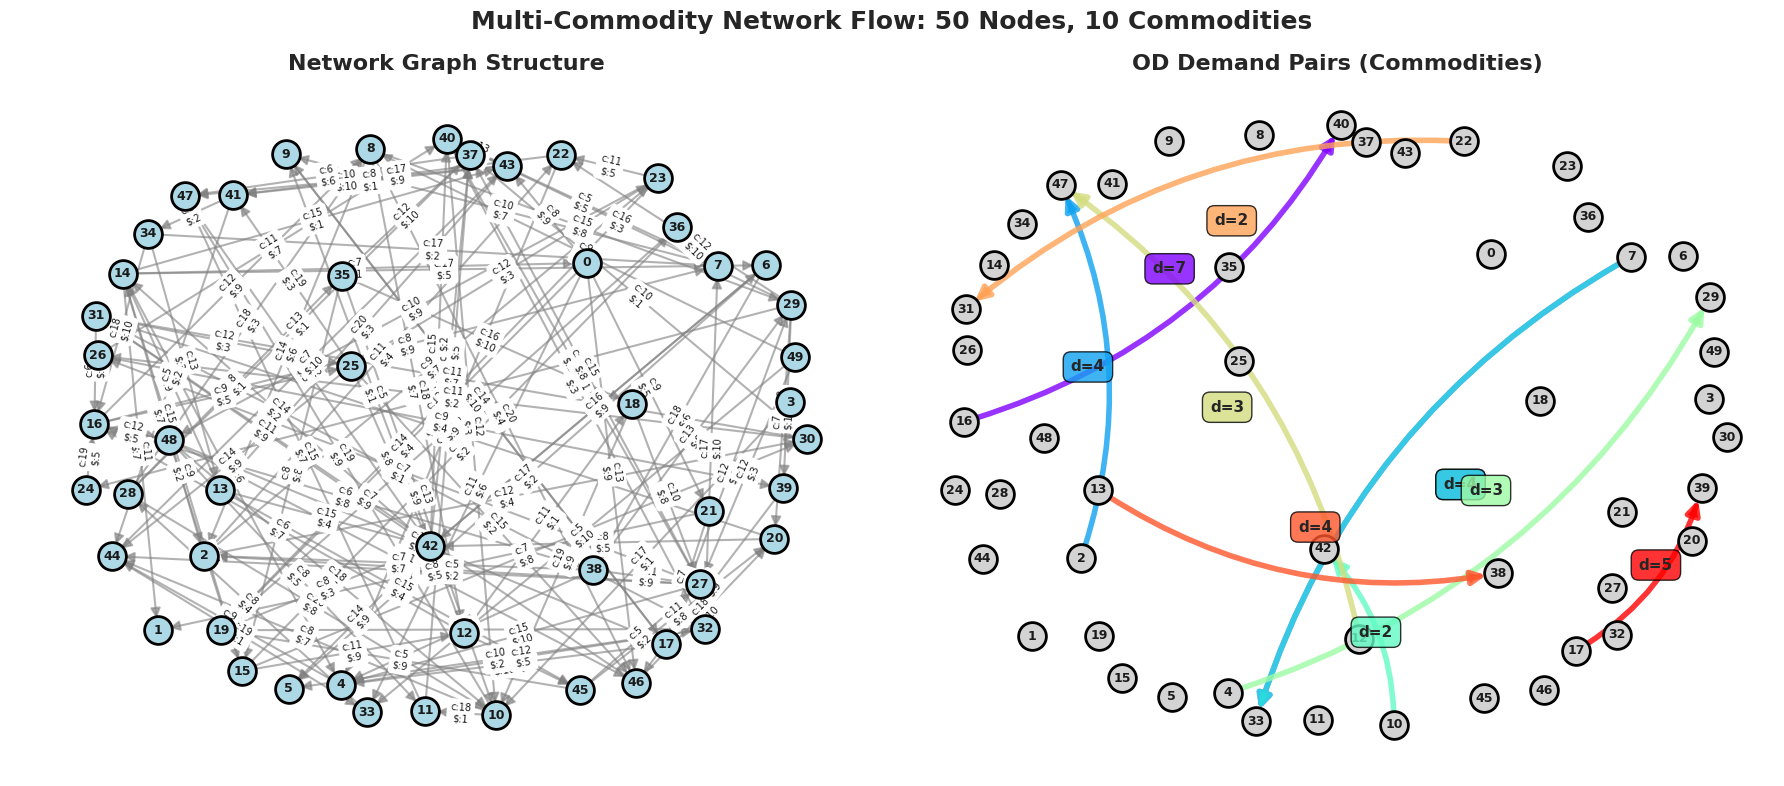

In [45]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

network = pd.read_csv('network/custom_network.csv')
demand = pd.read_csv('network/custom_demand.csv')

G = nx.DiGraph()

for _, row in network.iterrows():
    G.add_edge(row['from'], row['to'],
               capacity=row['capacity'],
               cost=row['cost'])

pos = nx.spring_layout(G, k=2, iterations=50, seed=42)

ax = axes[0]
ax.set_title('Network Graph Structure', fontsize=16, fontweight='bold')
nx.draw_networkx_nodes(G, pos, node_size=400, node_color='lightblue',
                       edgecolors='black', linewidths=2, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold', ax=ax)
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True,
                       arrowsize=15, width=1.5, alpha=0.6, ax=ax)

edge_labels = {(u, v): f"c:{d['capacity']}\n$:{d['cost']}"
               for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=7, ax=ax)
ax.axis('off')

ax = axes[1]
ax.set_title('OD Demand Pairs (Commodities)', fontsize=16, fontweight='bold')
nx.draw_networkx_nodes(G, pos, node_size=400, node_color='lightgray',
                       edgecolors='black', linewidths=2, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold', ax=ax)

colors = plt.cm.rainbow(np.linspace(0, 1, len(demand)))

for idx, (_, row) in enumerate(demand.iterrows()):
    origin = row['origin']
    dest = row['destination']
    dem = row['demand']

    if origin in G and dest in G:
        nx.draw_networkx_edges(G, pos, [(origin, dest)],
                              edge_color=[colors[idx]],
                              width=4, arrows=True, arrowsize=20,
                              connectionstyle='arc3,rad=0.2',
                              alpha=0.8, ax=ax)

        mid_x = (pos[origin][0] + pos[dest][0]) / 2
        mid_y = (pos[origin][1] + pos[dest][1]) / 2
        ax.text(mid_x, mid_y, f'd={dem}', fontsize=11,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5',
                         facecolor=colors[idx], alpha=0.8, edgecolor='black'))

ax.axis('off')

plt.suptitle(f'Multi-Commodity Network Flow: {NUM_NODES} Nodes, {NUM_OD_PAIRS} Commodities',
             fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('network_flow_visualization.png', dpi=150, bbox_inches='tight')
print("\n✅ Visualization saved: network_flow_visualization.png")
plt.show()


In [46]:
from google.colab import files
files.download('network_flow_visualization.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
print("=" * 70)
print("MULTI-COMMODITY NETWORK FLOW SUMMARY")
print("=" * 70)
print(f"Network Configuration:")
print(f"  • Nodes: {NUM_NODES}")
print(f"  • Edges: {len(network)}")
print(f"  • Commodities (OD Pairs): {NUM_OD_PAIRS}")
print(f"\nTotal Demand: {demand['demand'].sum()} units")
print(f"Average Edge Capacity: {network['capacity'].mean():.1f}")
print(f"Average Edge Cost: {network['cost'].mean():.1f}")
print("=" * 70)


MULTI-COMMODITY NETWORK FLOW SUMMARY
Network Configuration:
  • Nodes: 50
  • Edges: 146
  • Commodities (OD Pairs): 10

Total Demand: 39 units
Average Edge Capacity: 12.0
Average Edge Cost: 5.4
